# Tic Tac Toe Machine

In [72]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

from qiskit.circuit.library import PhaseOracle

# import basic plot tools
from qiskit.visualization import plot_histogram

In [73]:
def initialize_s(qc, n):
    for q in list(range(n)):
        qc.h(q)

In [74]:
def multicontrolled_z(qc, control, target):
    qc.h(target)
    qc.mct(control, target)
    qc.h(target)

def diffuser(qc):
    for qubit in range(10):
        qc.h(qubit)
        qc.x(qubit)

    multicontrolled_z(qc, list(range(9)), 9)

    for qubit in range(10):
        qc.x(qubit)
        qc.h(qubit)

In [75]:
circuit = QuantumCircuit(10, 10)

# Expression defining all the winning states
expression = '(x1 & x2 & x3) ^ (y1 & y2 & y3) ^ (z1 & z2 & z3) ^ (x1 & y1 & z1) ^ (x2 & y2 & z2) ^ (x3 & y3 & z3) ^ (x1 & y2 & z3) ^ (x3 & y2 & z1)'

initialize_s(circuit, 10)

for i in range(3):
    circuit.barrier(list(range(10)))

    circuit.append(PhaseOracle(expression), list(range(9)))

    circuit.barrier(list(range(10)))

    diffuser(circuit)


# Output
circuit.measure(list(range(9)), list(range(9)))
#circuit.measure([9], [8])

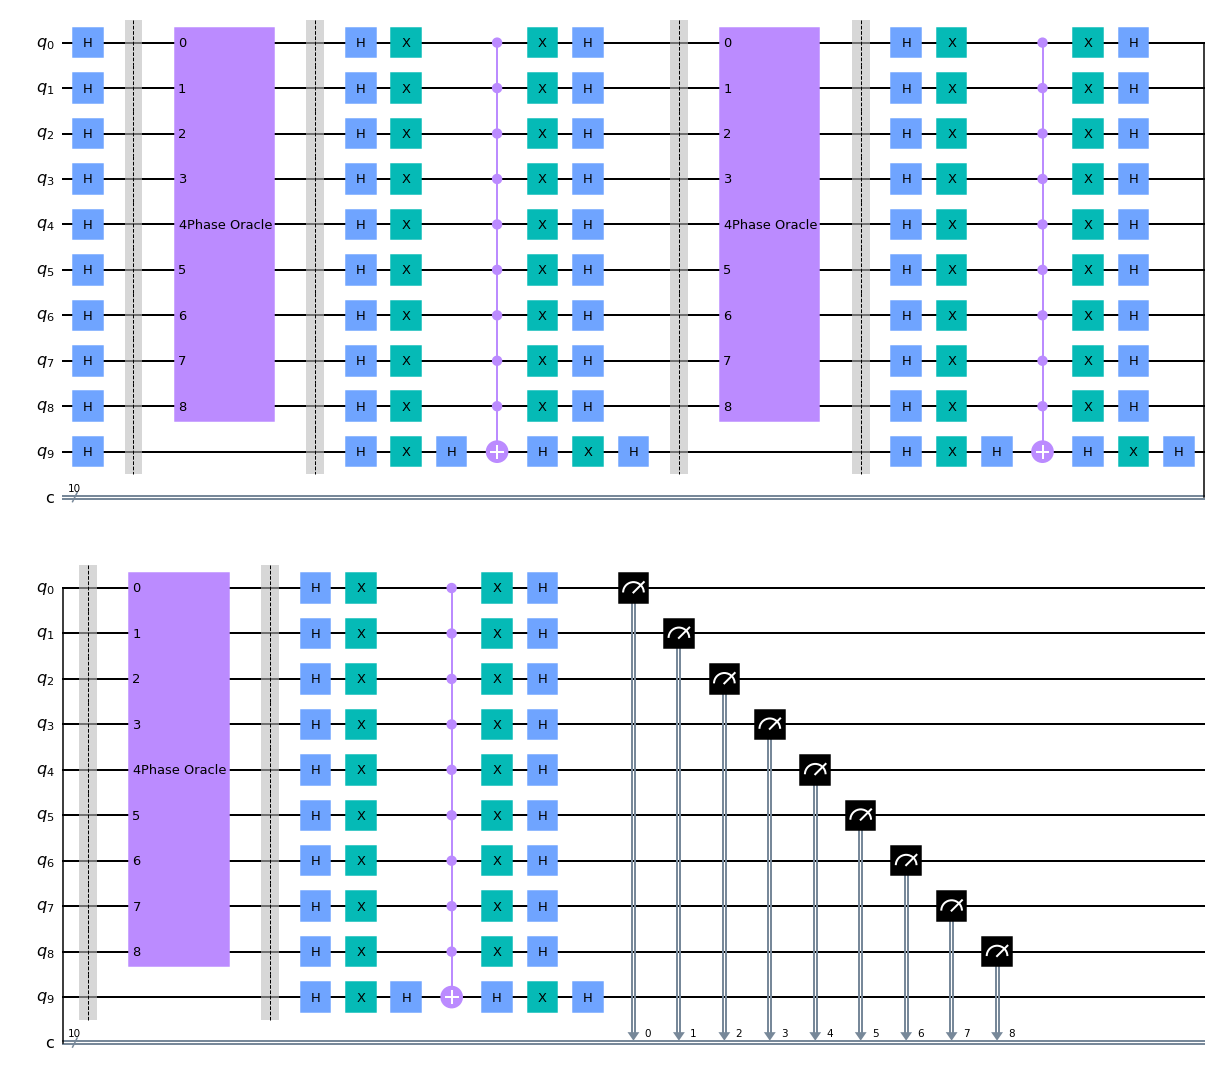

In [76]:
circuit.draw(output='mpl')

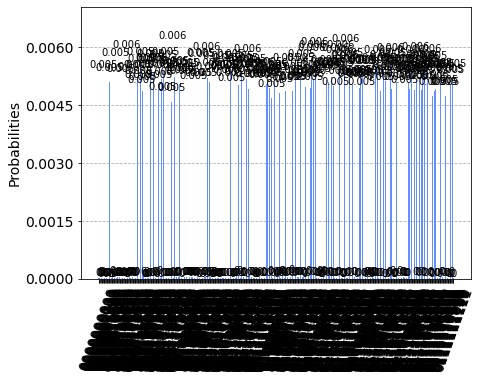

In [77]:
N = 100000
simulator = Aer.get_backend('aer_simulator')
results = execute(circuit, backend=simulator, shots=N).result()
counts = results.get_counts()
plot_histogram(counts)

array([[<AxesSubplot:title={'center':'1'}>]], dtype=object)

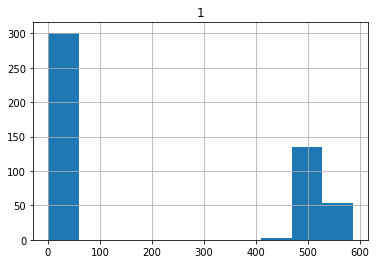

In [78]:
import pandas as pd
df = pd.DataFrame(counts.items())
df = df.sort_values(by=1, ascending=False)

df.hist()

In [79]:
print(df)

              0    1
345  0001101001  587
245  0101100101  579
208  0100111000  572
427  0101011101  566
100  0100110110  565
..          ...  ...
356  0110001001    1
29   0011011111    1
337  0000000010    1
39   0110101000    1
0    0111111000    1

[493 rows x 2 columns]


In [80]:
sum(list(df[1]))

100000

In [81]:
df.to_csv('thangu.csv')

In [82]:
2**9

512

Hence, the problem is solved